In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from langdetect import detect
import numpy as np
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

file_path_train = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/assignment-comp3222-comp6246-mediaeval2015-dataset/dataset/mediaeval-2015-trainingset.txt'
file_path_test = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/assignment-comp3222-comp6246-mediaeval2015-dataset/dataset/mediaeval-2015-testset.txt'
df_train = pd.read_csv(file_path_train, sep='\t', lineterminator='\n')
df_test = pd.read_csv(file_path_test, sep='\t', lineterminator='\n')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [192]:
print(df_train['tweetText'].duplicated().sum())
print(df_test['tweetText'].duplicated().sum())

1901
49


In [151]:
df_train.head(10)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake
5,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake
6,262927032705490944,Just in time for #halloween a photo of #hurric...,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,fake
7,263321078884077568,Crazy pic of #Hurricane #Sandy prayers go out ...,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,fake
8,263111677485142017,#sandy #newyork #hurricane #statueofliberty #U...,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,fake
9,262977091983785985,#nyc #hurricane http://t.co/Gv3QxZlq,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,fake


In [152]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14277 non-null  int64 
 1   tweetText   14277 non-null  object
 2   userId      14277 non-null  int64 
 3   imageId(s)  14277 non-null  object
 4   username    14277 non-null  object
 5   timestamp   14277 non-null  object
 6   label       14277 non-null  object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


In [153]:
df_train.shape

(14277, 7)

In [154]:
df_test.head(10)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... htt...,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse fr...,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C...,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake
5,579274670853226496,“@ebonfigli: Éclipse vue de l'ISS... Autre cho...,470889709,eclipse_01,BusineMi,Sat Mar 21 13:33:38 +0000 2015,fake
6,578861590482665472,Éclipse vue de l'ISS... Autre chose... http://...,383831305,eclipse_01,ebonfigli,Fri Mar 20 10:12:12 +0000 2015,fake
7,578976098052091904,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,3044246089,eclipse_01,OumNur,Fri Mar 20 17:47:13 +0000 2015,fake
8,578844275061981184,Dit dus \0/ RT “@News_Executive: The Solar ecl...,291020879,eclipse_01,PatriciaKusters,Fri Mar 20 09:03:24 +0000 2015,fake
9,578838737448235008,Photo: The Solar eclipse as seen from the Inte...,364810202,eclipse_01,News_Executive,Fri Mar 20 08:41:23 +0000 2015,fake


In [155]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     3755 non-null   int64 
 1   tweetText   3755 non-null   object
 2   userId      3755 non-null   int64 
 3   imageId(s)  3755 non-null   object
 4   username    3755 non-null   object
 5   timestamp   3755 non-null   object
 6   label       3755 non-null   object
dtypes: int64(2), object(5)
memory usage: 205.5+ KB


In [156]:
df_test.shape

(3755, 7)

In [157]:
# Training Data Analysis and Visualization

In [158]:
# Language Detection
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'  # In case of detection error

df_train['language'] = df_train['tweetText'].apply(detect_language)

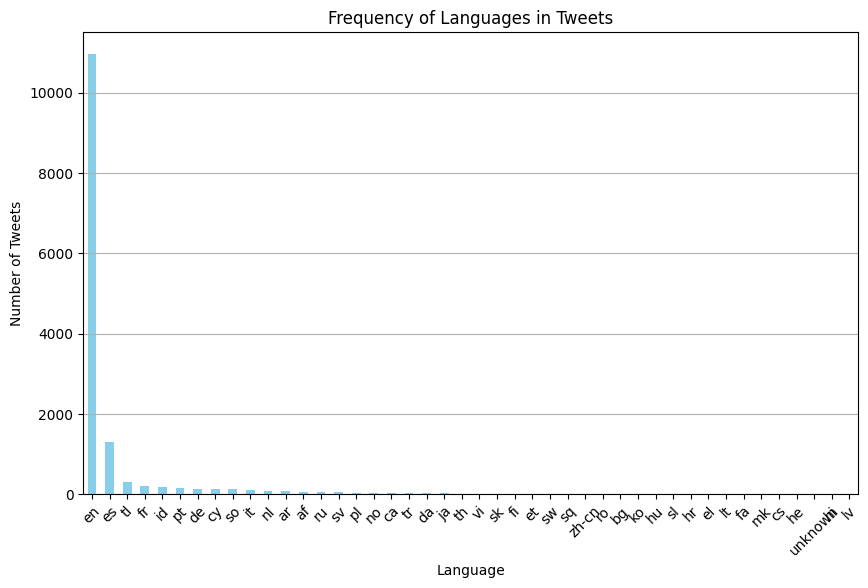

In [67]:
plt.figure(figsize=(10, 6))
df_train['language'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Languages in Tweets')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/language_histogram.png' 
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

In [159]:
df_train['char_count'] = df_train['tweetText'].str.len()

max_char = df_train['char_count'].max()
min_char = df_train['char_count'].min()
min_char, max_char

(26, 7125)

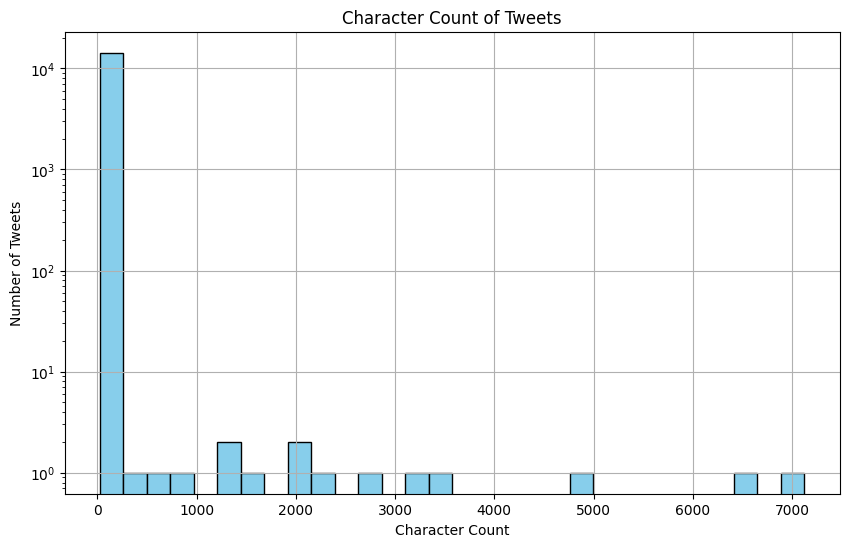

In [165]:
# Create a Histogram for Character Count
plt.figure(figsize=(10, 6)) 
plt.hist(df_train['char_count'], bins=30, color='skyblue', edgecolor='black', log=True) 
plt.title('Character Count of Tweets')  
plt.xlabel('Character Count')  
plt.ylabel('Number of Tweets')  
plt.grid(True) 

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Character_Count_of_English_Tweets.png' 
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

In [160]:
def count_words(text):
    words = text.split()
    return len(words)
    
df_train['word_count'] = df_train['tweetText'].apply(count_words)

max_word = df_train['word_count'].max()
min_word = df_train['word_count'].min()

min_word, max_word

(1, 901)

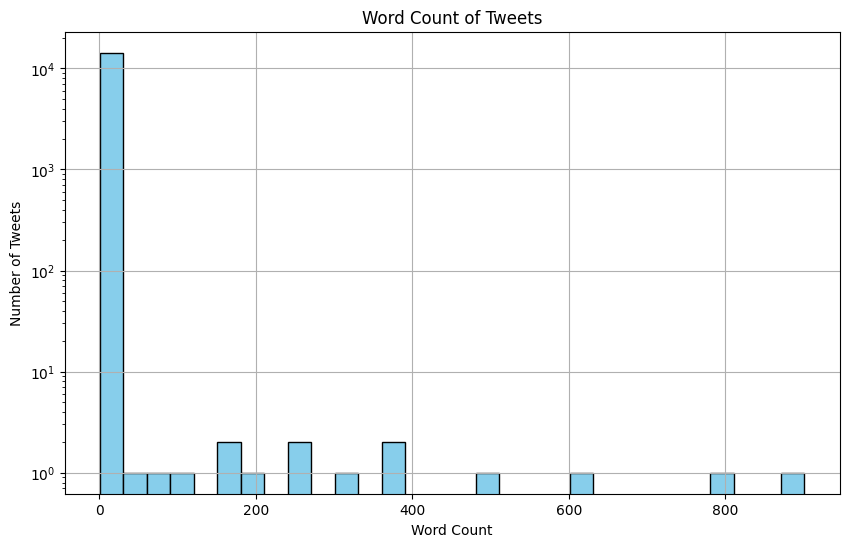

In [166]:
# Create a Histogram for Word Count
plt.figure(figsize=(10, 6))  
plt.hist(df_train['word_count'], bins=30, color='skyblue', edgecolor='black', log=True) 
plt.title('Word Count of Tweets') 
plt.xlabel('Word Count')  
plt.ylabel('Number of Tweets')  
plt.grid(True)

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Word_Count_of_English_Tweets.png' 
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

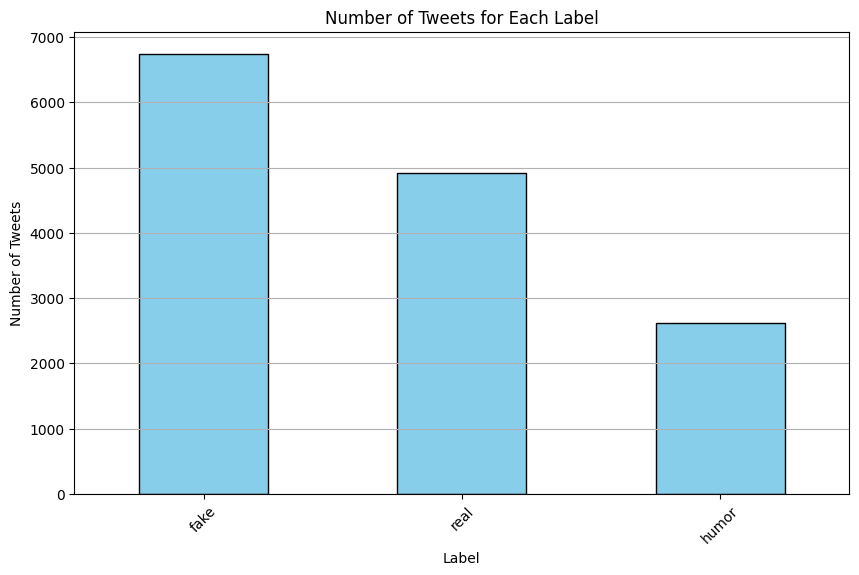

In [196]:
# Count the occurrences of each label
label_counts_train = df_train['label'].value_counts()

# Create a Histogram for Label Counts
plt.figure(figsize=(10, 6))  
label_counts_train.plot(kind='bar', color='skyblue', edgecolor='black')  
plt.title('Number of Tweets for Each Label')  
plt.xlabel('Label') 
plt.ylabel('Number of Tweets') 
plt.xticks(rotation=45)  
plt.grid(axis='y')  

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Number_of_English_Tweets_for_Each_Label.png' 
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

In [198]:
print(label_counts)
label_counts_test = df_test['label'].value_counts()
print(label_counts_test)

label
fake     6742
real     4921
humor    2614
Name: count, dtype: int64
label
fake    2546
real    1209
Name: count, dtype: int64


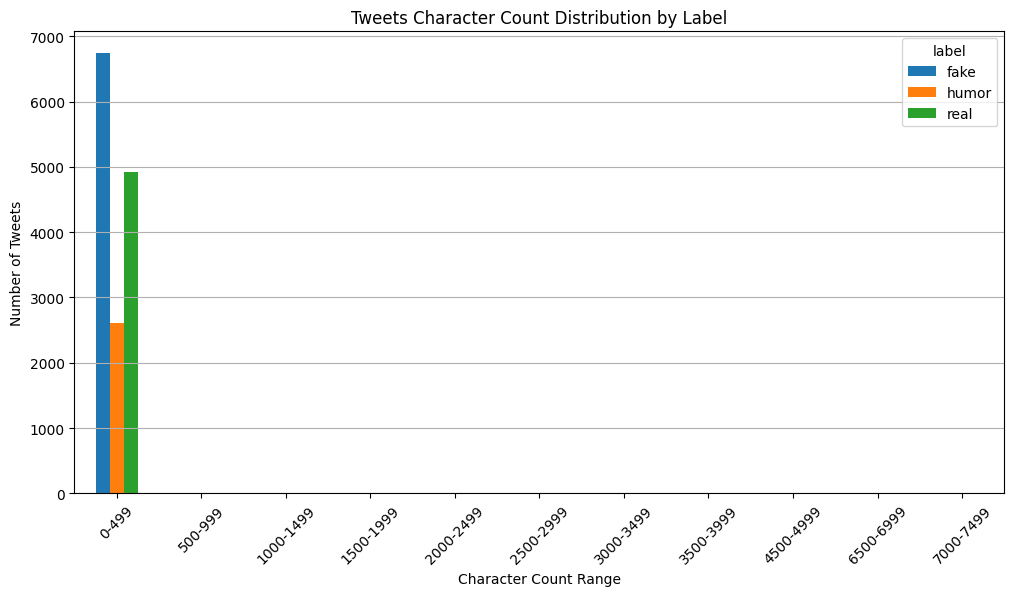

In [170]:
# Define character count bins
bins = np.arange(0, df_train['char_count'].max() + 500, 500)
labels = ['{}-{}'.format(i, i + 499) for i in bins[:-1]]
df_train['char_count_bin'] = pd.cut(df_train['char_count'], bins=bins, labels=labels, right=False)

# Filter for the three labels and group by bin and label
df_filtered = df_train[df_train['label'].isin(['fake', 'real', 'humor'])]
grouped = df_filtered.groupby(['char_count_bin', 'label'], observed=True).size().unstack(fill_value=0)

grouped.plot(kind='bar', figsize=(12, 6))

plt.title('Tweets Character Count Distribution by Label')
plt.xlabel('Character Count Range')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Character_Count_Distribution_by_Label_EN.png' 
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

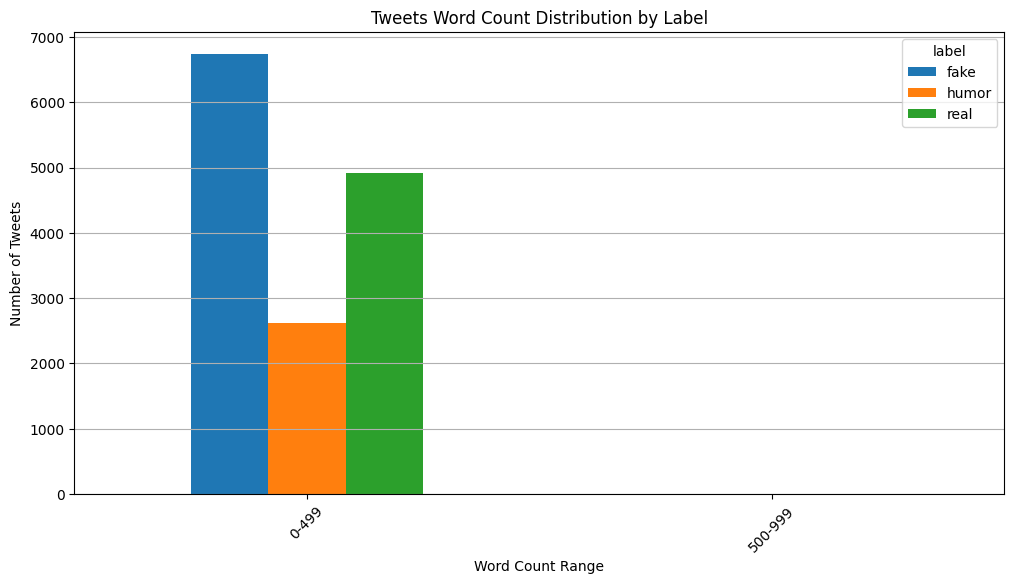

In [171]:
# Define word count bins
bins = np.arange(0, df_train['word_count'].max() + 500, 500)
labels = ['{}-{}'.format(i, i + 499) for i in bins[:-1]]
df_train['word_count_bin'] = pd.cut(df_train['word_count'], bins=bins, labels=labels, right=False)

# Filter for the three labels and group by bin and label
df_filtered = df_train[df_train['label'].isin(['fake', 'real', 'humor'])]
grouped = df_filtered.groupby(['word_count_bin', 'label'], observed=True).size().unstack(fill_value=0)

grouped.plot(kind='bar', figsize=(12, 6))

plt.title('Tweets Word Count Distribution by Label')
plt.xlabel('Word Count Range')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Word_Count_Distribution_by_Label_EN.png' 
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

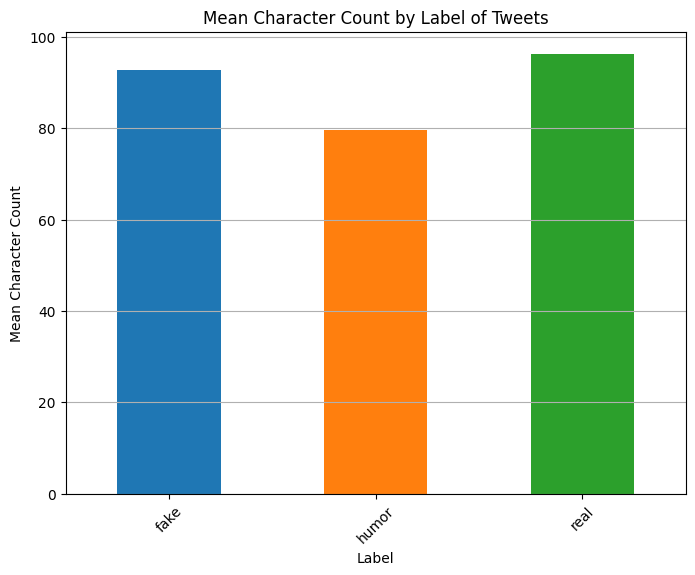

In [172]:
labels_of_interest = ['fake', 'real', 'humor'] 

mean_char_counts = df_train[df_train['label'].isin(labels_of_interest)].groupby('label')['char_count'].mean()

plt.figure(figsize=(8, 6))
mean_char_counts.plot(kind='bar', color=['tab:blue','tab:orange','tab:green'])

plt.title('Mean Character Count by Label of Tweets')
plt.xlabel('Label')
plt.ylabel('Mean Character Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Mean_Length_by_Label_EN.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

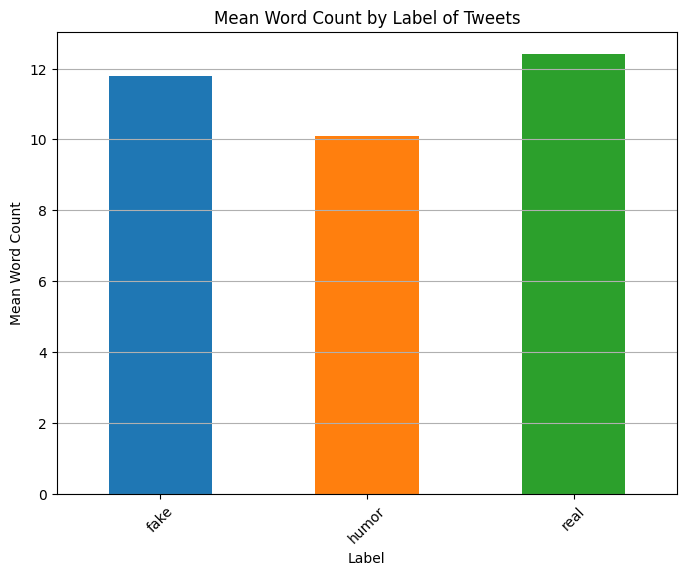

In [173]:
labels_of_interest = ['fake', 'real', 'humor'] 

mean_char_counts = df_train[df_train['label'].isin(labels_of_interest)].groupby('label')['word_count'].mean()

plt.figure(figsize=(8, 6))
mean_char_counts.plot(kind='bar', color=['tab:blue','tab:orange','tab:green'])

plt.title('Mean Word Count by Label of Tweets')
plt.xlabel('Label')
plt.ylabel('Mean Word Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Mean_Word_Count_by_Label_EN.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

In [174]:
df_train['tweetText'].describe()

count                                                 14277
unique                                                12376
top       Unbelievable scene flying over #StatenIsland i...
freq                                                     42
Name: tweetText, dtype: object

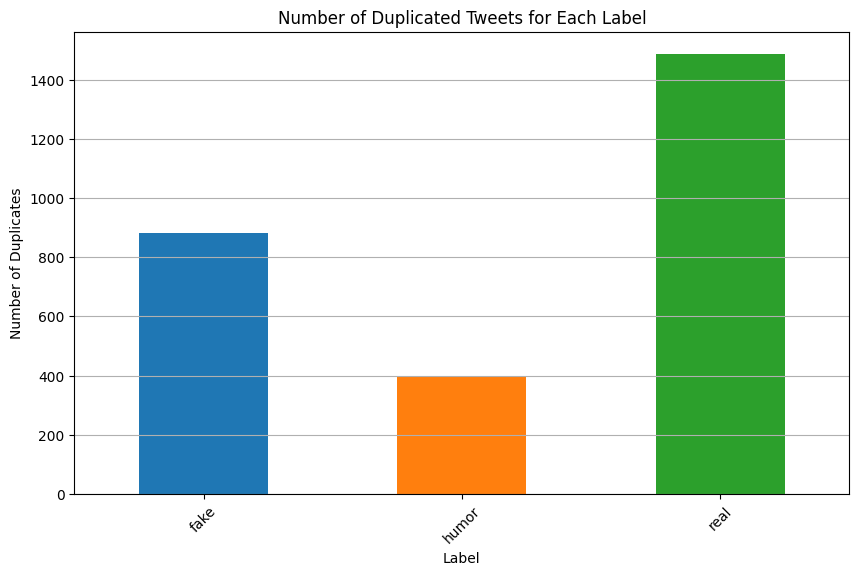

In [175]:
df_train['is_duplicate'] = df_train.duplicated(subset='tweetText', keep=False)

duplicates = df_train[df_train['is_duplicate']]

duplicates_by_label = duplicates['label'].value_counts()

custom_order = ['fake', 'humor', 'real'] 

duplicates_by_label = duplicates_by_label.reindex(custom_order)

plt.figure(figsize=(10, 6))
duplicates_by_label.plot(kind='bar', color=['tab:blue','tab:orange','tab:green'])

plt.title('Number of Duplicated Tweets for Each Label')
plt.xlabel('Label')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45)
plt.grid(axis='y')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Number_of_Duplicated_English_Tweets_for_Each_Label.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

In [176]:
df_train['username'].describe()

count           14277
unique          13498
top       SAGandAFTRA
freq               16
Name: username, dtype: object

In [177]:
print(df_train[df_train['username'].duplicated()])

                  tweetId                                          tweetText  \
114    263261769596809217  ThisIsComical. (NotReal) #NYC #TimesSquare #Hu...   
202    263062218499817472  #hurricane #sandy #newyork #amazing 🌀☔☁😲 http:...   
238    262991540677390336  Glad I got outa NY. Hurricane Sandy is crazy!!...   
239    262957248303747074  #Hurricane #Sandy approaching the #StatueofLib...   
273    262980752222855168  #newyork #hurricane красиво и страшно😊 http://...   
...                   ...                                                ...   
13949  445749981958668288  ♦ http://t.co/CRtTEFSa45 592 ♦ Bermuda Triangl...   
13951  449120023743713280  @BBCBreaking News Malaysia Airlines MH370 foun...   
13956  445839949762265089  11°34'36.2"N 92°40'49.5"E RT @sunshaoan: Missi...   
13957  442870012311646209  Door and tail fragment of Malaysia flight MH37...   
13980  446050364916527104  How do u know? RT @chartreuseb: I'm no expert ...   

           userId        imageId(s)    

In [178]:
print(df_train[df_train['username'] == 'ConfusintheGOVT'])

                 tweetId                                          tweetText  \
28    263263438988533760  Shark. #Sandy #JerseyIThink #Hurricane #NYC #S...   
114   263261769596809217  ThisIsComical. (NotReal) #NYC #TimesSquare #Hu...   
9177  263260838058676224  RushingWaters. #NYC #Sandy #Hurricane #Damage ...   

        userId      imageId(s)         username  \
28    91474790  sandyA_fake_11  ConfusintheGOVT   
114   91474790  sandyA_fake_23  ConfusintheGOVT   
9177  91474790  sandyA_real_03  ConfusintheGOVT   

                           timestamp label language  char_count  word_count  \
28    Tue Oct 30 12:57:49 +0000 2012  fake       en         122          10   
114   Tue Oct 30 12:51:11 +0000 2012  fake       en         120          10   
9177  Tue Oct 30 12:47:29 +0000 2012  real       en          84           8   

     char_count_bin word_count_bin  is_duplicate  
28            0-499          0-499         False  
114           0-499          0-499         False  
9177    

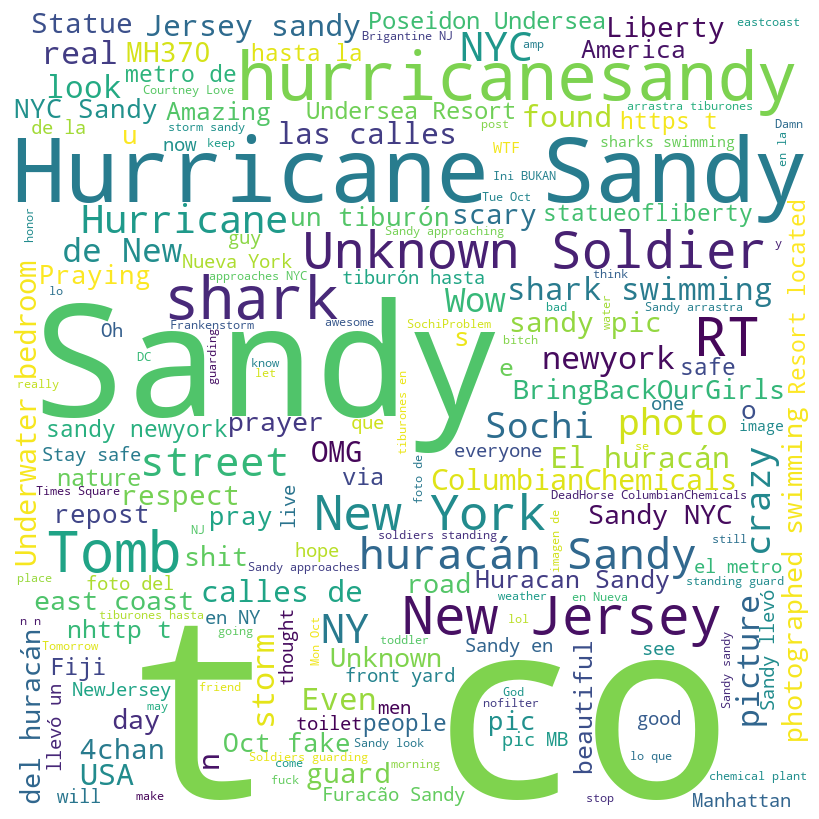

In [181]:
from wordcloud import WordCloud

fake_tweets = df_train[df_train['label'] == 'fake']

text = ' '.join(tweet for tweet in fake_tweets['tweetText'])

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(text)
                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Wordcloud_fake.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

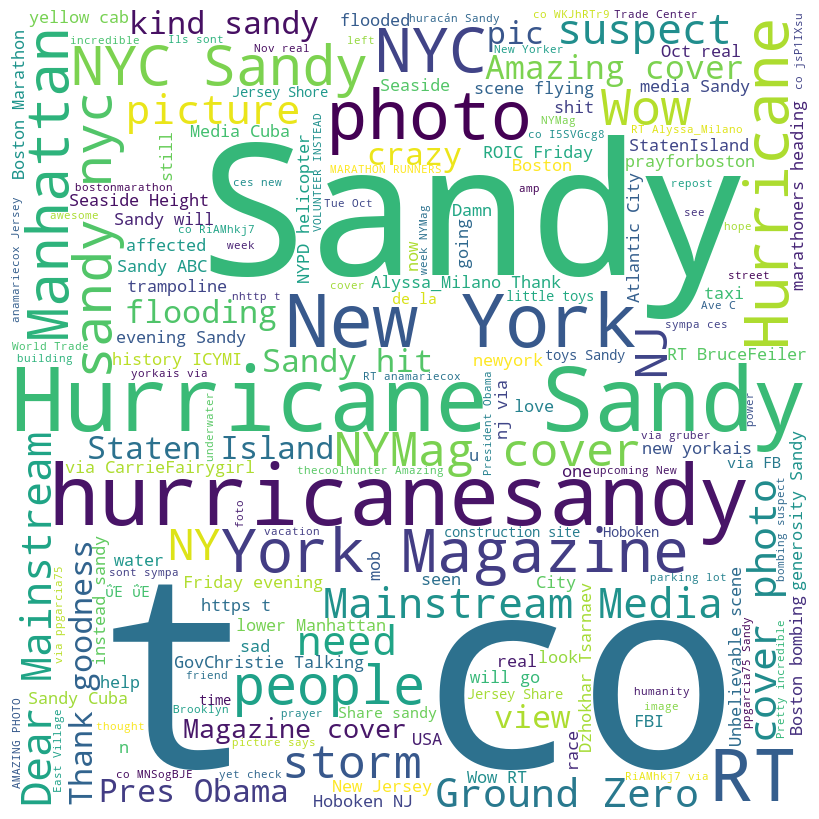

In [182]:
from wordcloud import WordCloud

fake_tweets = df_train[df_train['label'] == 'real']

text = ' '.join(tweet for tweet in fake_tweets['tweetText'])

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(text)
                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Wordcloud_real.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

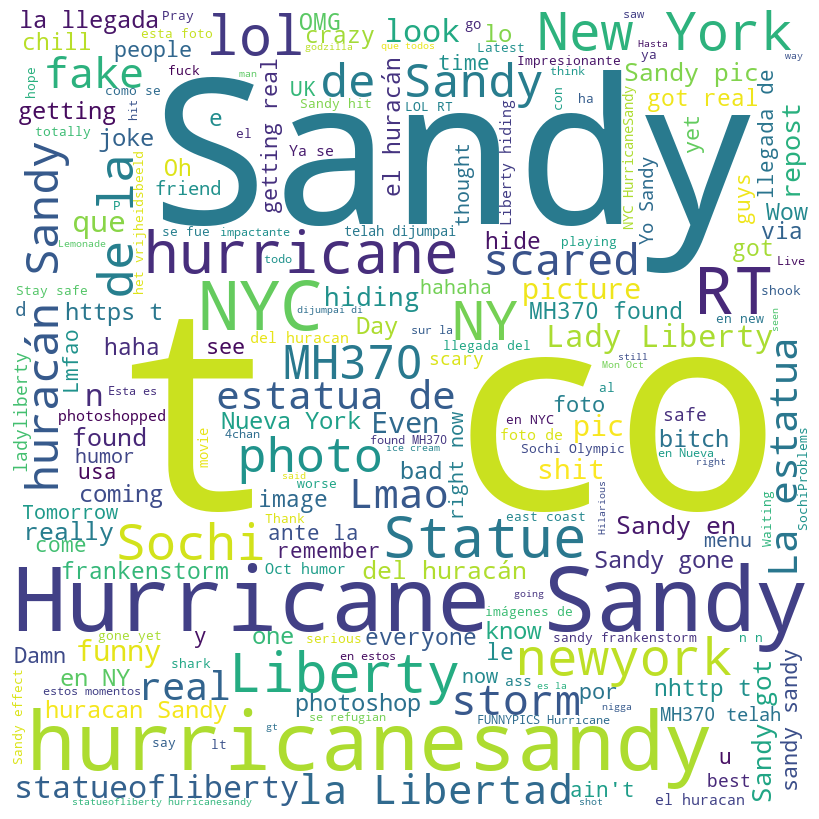

In [183]:
from wordcloud import WordCloud

fake_tweets = df_train[df_train['label'] == 'humor']

text = ' '.join(tweet for tweet in fake_tweets['tweetText'])

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(text)
                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Wordcloud_humor.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

In [232]:
# Pre-processing of the Training Data

In [199]:
import re

def clean_text(text):
    # remove URL
    text = re.sub(r'http\S+', '', text)
    # remove non-characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # to lowercase
    text = text.lower()
    return text

# clean the data set
df_train['tweetText'] = df_train['tweetText'].apply(clean_text)
df_test['tweetText'] = df_test['tweetText'].apply(clean_text)

In [200]:
print(df_train['tweetText'].duplicated().sum())
print(df_test['tweetText'].duplicated().sum())

2849
1921


In [202]:
# Replace 'humor' with 'fake' in the 'label' column
df_train['label'] = df_train['label'].map({'fake': 1, 'humor': 1, 'real': 0})
df_test['label'] = df_test['label'].map({'fake': 1, 'humor': 1, 'real': 0})

print(df_train['label'].value_counts())
print(df_test['label'].value_counts())

label
1    9356
0    4921
Name: count, dtype: int64
label
1    2546
0    1209
Name: count, dtype: int64


In [89]:
# Machine Learning Model Training

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')

num_words = 4000
vectorizer = TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords)

X_train = vectorizer.fit_transform(df_train['tweetText'])
X_test = vectorizer.transform(df_test['tweetText'])

y_train = df_train['label']
y_test = df_test['label']

In [204]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import numpy as np

# Custom transformer to extract the length of each tweet
class TextLengthExtractor(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, x):
        return np.array([len(text) for text in x]).reshape(-1, 1)

pipeline_rf_1 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords)),
        ('text_length', TextLengthExtractor())
    ])),
    ('classifier', RandomForestClassifier())
])

pipeline_svm_1 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords)),
        ('text_length', TextLengthExtractor())
    ])),
    ('classifier', SVC())
])

pipeline_rf_1.fit(df_train['tweetText'], df_train['label'])
pipeline_svm_1.fit(df_train['tweetText'], df_train['label'])

y_pred_rf = pipeline_rf_1.predict(df_test['tweetText'])
y_pred_svm = pipeline_svm_1.predict(df_test['tweetText'])

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("SVM Performance:")
print(classification_report(y_test, y_pred_svm, zero_division=0))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.13      0.02      0.04      1209
           1       0.67      0.92      0.77      2546

    accuracy                           0.63      3755
   macro avg       0.40      0.47      0.41      3755
weighted avg       0.49      0.63      0.54      3755

SVM Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1209
           1       0.68      1.00      0.81      2546

    accuracy                           0.68      3755
   macro avg       0.34      0.50      0.40      3755
weighted avg       0.46      0.68      0.55      3755



In [205]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import numpy as np

# Custom transformer to extract the length of each tweet
class TextLengthExtractor(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, x):
        return np.array([len(text) for text in x]).reshape(-1, 1)

pipeline_rf_2 = Pipeline([
    ('features', FeatureUnion([
        ('text_length', TextLengthExtractor())
    ])),
    ('classifier', RandomForestClassifier())
])

pipeline_svm_2 = Pipeline([
    ('features', FeatureUnion([
        ('text_length', TextLengthExtractor())
    ])),
    ('classifier', SVC())
])

pipeline_rf_2.fit(df_train['tweetText'], df_train['label'])
pipeline_svm_2.fit(df_train['tweetText'], df_train['label'])

y_pred_rf = pipeline_rf_2.predict(df_test['tweetText'])
y_pred_svm = pipeline_svm_2.predict(df_test['tweetText'])

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("SVM Performance:")
print(classification_report(y_test, y_pred_svm, zero_division=0))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.21      0.02      0.04      1209
           1       0.67      0.96      0.79      2546

    accuracy                           0.66      3755
   macro avg       0.44      0.49      0.42      3755
weighted avg       0.53      0.66      0.55      3755

SVM Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1209
           1       0.68      1.00      0.81      2546

    accuracy                           0.68      3755
   macro avg       0.34      0.50      0.40      3755
weighted avg       0.46      0.68      0.55      3755



In [206]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import numpy as np

pipeline_rf_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords))
    ])),
    ('classifier', RandomForestClassifier())
])

pipeline_svm_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords))
    ])),
    ('classifier', SVC())
])

pipeline_rf_3.fit(df_train['tweetText'], df_train['label'])
pipeline_svm_3.fit(df_train['tweetText'], df_train['label'])

y_pred_rf = pipeline_rf_3.predict(df_test['tweetText'])
y_pred_svm = pipeline_svm_3.predict(df_test['tweetText'])

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.16      0.01      0.03      1209
           1       0.67      0.96      0.79      2546

    accuracy                           0.66      3755
   macro avg       0.42      0.49      0.41      3755
weighted avg       0.51      0.66      0.55      3755

SVM Performance:
              precision    recall  f1-score   support

           0       0.83      0.63      0.72      1209
           1       0.84      0.94      0.89      2546

    accuracy                           0.84      3755
   macro avg       0.84      0.79      0.80      3755
weighted avg       0.84      0.84      0.83      3755



Random Forest Accuracy: 0.647936085219707


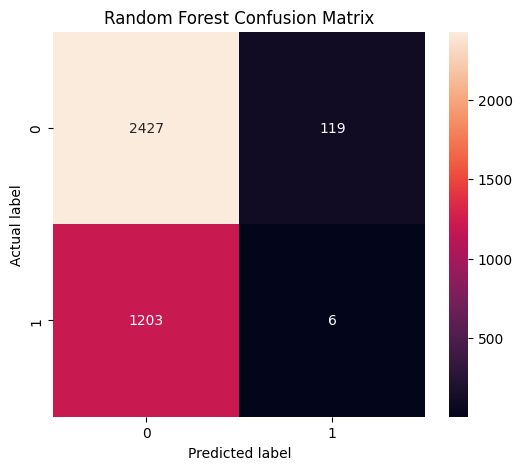

In [271]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Confusion_Matrix_rf.png'  
plt.savefig(output_file_path, bbox_inches='tight')
plt.show()

SVM Accuracy: 0.8498002663115846


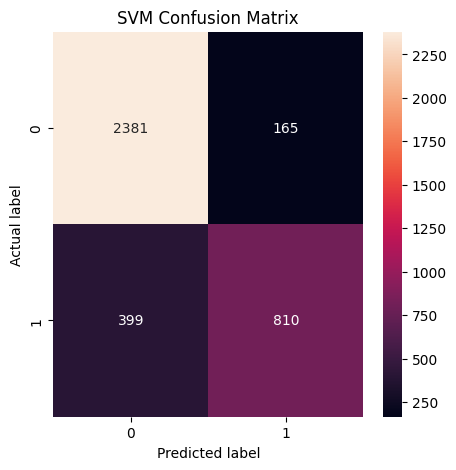

In [272]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_svm, annot=True, fmt="d")
plt.title("SVM Confusion Matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Confusion_Matrix_svm.png'  
plt.savefig(output_file_path, bbox_inches='tight')
plt.show()

In [274]:
# Evaluation

In [207]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

param_grid_svm = {
    'classifier__C': [0.1, 1],
    'classifier__gamma': [1, 0.1]
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None]
}

grid_search_svm = GridSearchCV(pipeline_svm_3, param_grid_svm, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(pipeline_rf_3, param_grid_rf, cv=5, scoring='accuracy')

grid_search_svm.fit(df_train['tweetText'], y_train)
grid_search_rf.fit(df_train['tweetText'], y_train)

# 输出最佳参数
print("Best parameters for SVM:")
print(grid_search_svm.best_params_)

print("Best parameters for Random Forest:")
print(grid_search_rf.best_params_)

Best parameters for SVM:
{'classifier__C': 1, 'classifier__gamma': 1}
Best parameters for Random Forest:
{'classifier__max_depth': None, 'classifier__n_estimators': 200}


In [209]:
#Use the best parameters for the prediction
svm_predictions = grid_search_svm.predict(df_test['tweetText'])
rf_predictions = grid_search_rf.predict(df_test['tweetText'])


print("SVM Performance with Best Parameters:")
print(classification_report(y_test, svm_predictions))

print("Random Forest Performance with Best Parameters:")
print(classification_report(y_test, rf_predictions))

SVM Performance with Best Parameters:
              precision    recall  f1-score   support

           0       0.83      0.63      0.72      1209
           1       0.84      0.94      0.89      2546

    accuracy                           0.84      3755
   macro avg       0.84      0.79      0.80      3755
weighted avg       0.84      0.84      0.83      3755

Random Forest Performance with Best Parameters:
              precision    recall  f1-score   support

           0       0.11      0.02      0.03      1209
           1       0.67      0.94      0.78      2546

    accuracy                           0.64      3755
   macro avg       0.39      0.48      0.40      3755
weighted avg       0.49      0.64      0.54      3755



In [210]:
pipeline_svm_3.get_params()

{'memory': None,
 'steps': [('features',
   FeatureUnion(transformer_list=[('tfidf',
                                   TfidfVectorizer(max_features=4000,
                                                   stop_words=['i', 'me', 'my',
                                                               'myself', 'we',
                                                               'our', 'ours',
                                                               'ourselves', 'you',
                                                               "you're", "you've",
                                                               "you'll", "you'd",
                                                               'your', 'yours',
                                                               'yourself',
                                                               'yourselves', 'he',
                                                               'him', 'his',
                                             

In [212]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

pipeline_svm_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords))
    ])),
    ('classifier', SVC())
])

param_grid = {
    'features__tfidf__max_df': [0.5, 0.75, 1.0],
    'features__tfidf__min_df': [1, 2, 5],
    'features__tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(pipeline_svm_3, param_grid, cv=5, n_jobs=-1, verbose=2)


grid_search.fit(df_train['tweetText'], df_train['label'])

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'features__tfidf__max_df': 0.5, 'features__tfidf__min_df': 1, 'features__tfidf__ngram_range': (1, 1)}


In [213]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.8387652258801944


In [214]:
svm_predictions = grid_search.predict(df_test['tweetText'])
print("SVM Performance with Best Parameters:")
print(classification_report(y_test, svm_predictions))

SVM Performance with Best Parameters:
              precision    recall  f1-score   support

           0       0.78      0.41      0.54      1209
           1       0.77      0.94      0.85      2546

    accuracy                           0.77      3755
   macro avg       0.77      0.68      0.69      3755
weighted avg       0.77      0.77      0.75      3755



In [215]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

pipeline_svm_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords))
    ])),
    ('classifier', SVC())
])

param_grid = {
    'features__tfidf__max_df': [0.5, 0.75, 1.0],
    'features__tfidf__min_df': [1, 2, 5],
    'features__tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline_svm_3, param_grid, cv=stratified_kfold, n_jobs=-1, verbose=2)

grid_search.fit(df_train['tweetText'], df_train['label'])

print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'features__tfidf__max_df': 0.5, 'features__tfidf__min_df': 2, 'features__tfidf__ngram_range': (1, 1)}


In [217]:
svm_predictions = grid_search.predict(df_test['tweetText'])
print("SVM Performance with Best Parameters:")
print(classification_report(y_test, svm_predictions))

SVM Performance with Best Parameters:
              precision    recall  f1-score   support

           0       0.74      0.41      0.52      1209
           1       0.77      0.93      0.84      2546

    accuracy                           0.76      3755
   macro avg       0.75      0.67      0.68      3755
weighted avg       0.76      0.76      0.74      3755



In [223]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

pipeline_svm_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords))
    ])),
    ('classifier', SVC())
])

param_grid = {
    'features__tfidf__max_df': [0.5, 0.75, 1.0],
    'features__tfidf__min_df': [1, 2, 5],
    'features__tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'features__tfidf__max_features': [4000, 4500, 5000],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline_svm_3, param_grid, cv=stratified_kfold, scoring='f1', n_jobs=-1, verbose=2)

grid_search.fit(df_train['tweetText'], df_train['label'])

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Fitting 3 folds for each of 1944 candidates, totalling 5832 fits
Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'features__tfidf__max_df': 0.75, 'features__tfidf__max_features': 4500, 'features__tfidf__min_df': 1, 'features__tfidf__ngram_range': (1, 1)}
Best F1 Score: 0.93586147918889


In [247]:
svm_best_predict = grid_search.best_estimator_.predict(df_test['tweetText'])
print("SVM Performance with Best Parameters:")
print(classification_report(y_test, svm_best_predict))

SVM Performance with Best Parameters:
              precision    recall  f1-score   support

           0       0.35      0.02      0.05      1209
           1       0.68      0.98      0.80      2546

    accuracy                           0.67      3755
   macro avg       0.51      0.50      0.42      3755
weighted avg       0.57      0.67      0.56      3755



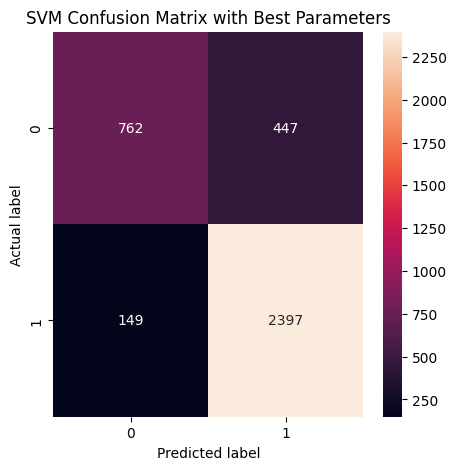

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

best_svm = grid_search.best_estimator_
y_pred_best_svm = best_svm.predict(df_test['tweetText'])

cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_best_svm, annot=True, fmt="d")
plt.title("SVM Confusion Matrix with Best Parameters")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Confusion_Matrix_Best_SVM.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

In [221]:
pipeline_rf_3.get_params()

{'memory': None,
 'steps': [('features',
   FeatureUnion(transformer_list=[('tfidf',
                                   TfidfVectorizer(max_features=4000,
                                                   stop_words=['i', 'me', 'my',
                                                               'myself', 'we',
                                                               'our', 'ours',
                                                               'ourselves', 'you',
                                                               "you're", "you've",
                                                               "you'll", "you'd",
                                                               'your', 'yours',
                                                               'yourself',
                                                               'yourselves', 'he',
                                                               'him', 'his',
                                             

In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')
num_words = 4000

pipeline_rf_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords))
    ])),
    ('classifier', RandomForestClassifier(class_weight='balanced'))
])

param_grid = {
    'classifier__class_weight': [{0: 1, 1: 3}, {0: 1, 1: 4}, 'balanced'],
    'classifier__n_estimators': [200, 250],
    'classifier__max_depth': [10, 20, None],
    'features__tfidf__max_features': [3000, 3500, 4000]
}

grid_search = GridSearchCV(pipeline_rf_3, param_grid, cv=10, scoring='f1', n_jobs=-1)

grid_search.fit(df_train['tweetText'], df_train['label'])

print("Best Parameters:", grid_search.best_params_)

rf_best_predict = grid_search.best_estimator_.predict(df_test['tweetText'])
print("Random Forest Performance with Best Parameters:")
print(classification_report(y_test, rf_best_predict))

Best Parameters: {'classifier__class_weight': {0: 1, 1: 3}, 'classifier__max_depth': None, 'classifier__n_estimators': 200, 'features__tfidf__max_features': 4000}
Random Forest Performance with Best Parameters:
              precision    recall  f1-score   support

           0       0.31      0.01      0.03      1209
           1       0.68      0.98      0.80      2546

    accuracy                           0.67      3755
   macro avg       0.49      0.50      0.42      3755
weighted avg       0.56      0.67      0.55      3755



In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')
num_words = 4000

pipeline_rf_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords))
    ])),
    ('classifier', RandomForestClassifier(class_weight='balanced'))
])

param_grid = {
    'classifier__class_weight': [{0: 1, 1: 4}, {0: 1, 1: 5}],
    'classifier__n_estimators': [200],
    'classifier__max_depth': [None],
    'features__tfidf__max_features': [3500, 3800]
}

grid_search = GridSearchCV(pipeline_rf_3, param_grid, cv=10, scoring='f1', n_jobs=-1)

grid_search.fit(df_train['tweetText'], df_train['label'])

print("Best Parameters:", grid_search.best_params_)

rf_best_predict = grid_search.best_estimator_.predict(df_test['tweetText'])
print("Random Forest Performance with Best Parameters:")
print(classification_report(y_test, rf_best_predict))

Best Parameters: {'classifier__class_weight': {0: 1, 1: 4}, 'classifier__max_depth': None, 'classifier__n_estimators': 200, 'features__tfidf__max_features': 3800}
Random Forest Performance with Best Parameters:
              precision    recall  f1-score   support

           0       0.35      0.02      0.05      1209
           1       0.68      0.98      0.80      2546

    accuracy                           0.67      3755
   macro avg       0.51      0.50      0.42      3755
weighted avg       0.57      0.67      0.56      3755



In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.metrics import classification_report

nltk_stopwords = stopwords.words('english')
num_words = 4000

pipeline_rf_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords))
    ])),
    ('classifier', RandomForestClassifier(class_weight='balanced'))
])

param_grid = {
    'classifier__class_weight': [{0: 1, 1: 5}, {0: 1, 1: 6}],
    'classifier__n_estimators': [200],
    'classifier__max_depth': [None],
    'features__tfidf__max_features': [3800, 3850]
}

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline_rf_3, param_grid, cv=stratified_kfold, scoring='f1', n_jobs=-1)
grid_search.fit(df_train['tweetText'], df_train['label'])

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

rf_best_predict = grid_search.best_estimator_.predict(df_test['tweetText'])
print("Random Forest Performance with Best Parameters:")
print(classification_report(y_test, rf_best_predict))

Best Parameters: {'classifier__class_weight': {0: 1, 1: 5}, 'classifier__max_depth': None, 'classifier__n_estimators': 200, 'features__tfidf__max_features': 3850}
Best F1 Score: 0.931365090577607
Random Forest Performance with Best Parameters:
              precision    recall  f1-score   support

           0       0.27      0.03      0.05      1209
           1       0.68      0.96      0.80      2546

    accuracy                           0.66      3755
   macro avg       0.47      0.50      0.42      3755
weighted avg       0.54      0.66      0.56      3755



In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.metrics import classification_report

nltk_stopwords = stopwords.words('english')
num_words = 4000

pipeline_rf_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords))
    ])),
    ('classifier', RandomForestClassifier(class_weight='balanced'))
])

param_grid = {
    'classifier__class_weight': [{0: 1, 1: 5}],
    'classifier__n_estimators': [200],
    'classifier__max_depth': [None],
    'features__tfidf__max_features': [3850],
    'features__tfidf__ngram_range': [(1, 1), (1, 2)]
}

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline_rf_3, param_grid, cv=stratified_kfold, scoring='f1', n_jobs=-1)
grid_search.fit(df_train['tweetText'], df_train['label'])

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

rf_best_predict = grid_search.best_estimator_.predict(df_test['tweetText'])
print("Random Forest Performance with Best Parameters:")
print(classification_report(y_test, rf_best_predict))

Best Parameters: {'classifier__class_weight': {0: 1, 1: 5}, 'classifier__max_depth': None, 'classifier__n_estimators': 200, 'features__tfidf__max_features': 3850, 'features__tfidf__ngram_range': (1, 1)}
Best F1 Score: 0.9312387607599042
Random Forest Performance with Best Parameters:
              precision    recall  f1-score   support

           0       0.34      0.03      0.05      1209
           1       0.68      0.98      0.80      2546

    accuracy                           0.67      3755
   macro avg       0.51      0.50      0.42      3755
weighted avg       0.57      0.67      0.56      3755



Random Forest Performance:
              precision    recall  f1-score   support

           0       0.32      0.03      0.06      1209
           1       0.68      0.97      0.80      2546

    accuracy                           0.67      3755
   macro avg       0.50      0.50      0.43      3755
weighted avg       0.56      0.67      0.56      3755



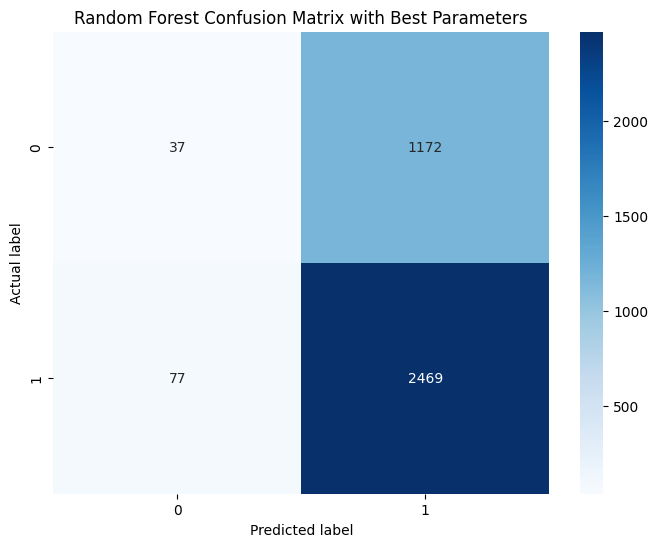

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')

pipeline_rf_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=3850, stop_words=nltk_stopwords))  
    ])),
    ('classifier', RandomForestClassifier(
        n_estimators=200,                 
        max_depth=None,                    
        class_weight={0: 1, 1: 5}          
    ))
])
pipeline_rf_3.fit(df_train['tweetText'], df_train['label'])

y_pred_rf_best = pipeline_rf_3.predict(df_test['tweetText'])

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf_best))

# Generate the confusion matrix for the best Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix with Best Parameters")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Confusion_Matrix_Best_RF.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')
df_two_features_train = df_train['tweetText'] + ' ' + df_train['username']
df_two_features_test = df_test['tweetText'] + ' ' + df_test['username']

pipeline_rf_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=3850, stop_words=nltk_stopwords))  
    ])),
    ('classifier', RandomForestClassifier(
        n_estimators=200,                 
        max_depth=None,                    
        class_weight={0: 1, 1: 5}          
    ))
])
pipeline_rf_3.fit(df_two_features_train, df_train['label'])

y_pred_rf_best = pipeline_rf_3.predict(df_two_features_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf_best))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.31      0.03      0.06      1209
           1       0.68      0.97      0.80      2546

    accuracy                           0.67      3755
   macro avg       0.50      0.50      0.43      3755
weighted avg       0.56      0.67      0.56      3755



Random Forest Performance:
              precision    recall  f1-score   support

           0       0.27      0.01      0.01      1209
           1       0.68      0.99      0.80      2546

    accuracy                           0.67      3755
   macro avg       0.48      0.50      0.41      3755
weighted avg       0.55      0.67      0.55      3755



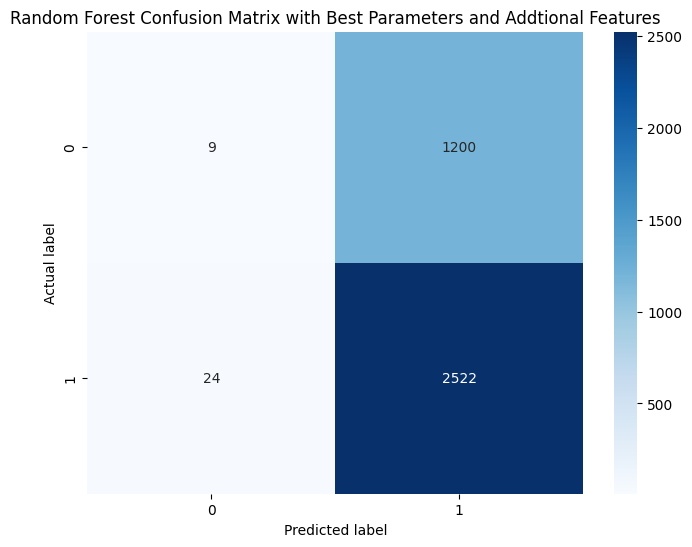

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')
df_two_features_train = df_train['tweetText'] + ' ' + df_train['timestamp']
df_two_features_test = df_test['tweetText'] + ' ' + df_test['timestamp']

pipeline_rf_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=3850, stop_words=nltk_stopwords))  
    ])),
    ('classifier', RandomForestClassifier(
        n_estimators=200,                 
        max_depth=None,                    
        class_weight={0: 1, 1: 5}          
    ))
])
pipeline_rf_3.fit(df_two_features_train, df_train['label'])

y_pred_rf_best = pipeline_rf_3.predict(df_two_features_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf_best))

# Generate the confusion matrix for the best Random Forest model with addtional features
cm_rf = confusion_matrix(y_test, y_pred_rf_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix with Best Parameters and Addtional Features")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Confusion_Matrix_Best_AddRF.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

SVM Performance with Best Parameters and Addtional Feature username:
              precision    recall  f1-score   support

           0       0.80      0.63      0.71      1209
           1       0.84      0.93      0.88      2546

    accuracy                           0.83      3755
   macro avg       0.82      0.78      0.79      3755
weighted avg       0.83      0.83      0.83      3755



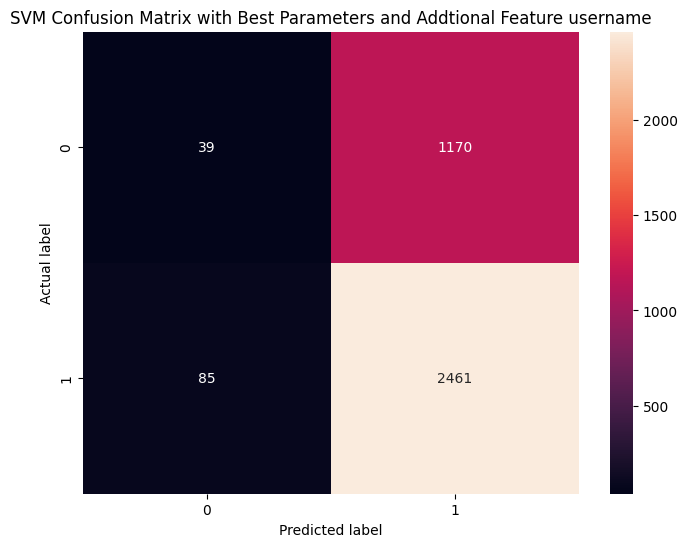

In [253]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')
df_two_features_train = df_train['tweetText'] + ' ' + df_train['username']
df_two_features_test = df_test['tweetText'] + ' ' + df_test['username']

pipeline_svm_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(
            max_features=4500,  # Update from best parameters
            max_df=0.75,        # Update from best parameters
            stop_words=nltk_stopwords
        ))
    ])),
    ('classifier', SVC(
        C=1,                 # Update from best parameters
        kernel='rbf'         # Update from best parameters
    ))
])

pipeline_svm_3.fit(df_two_features_train, y_train)
svm_predictions = pipeline_svm_3.predict(df_two_features_test)

print("SVM Performance with Best Parameters and Addtional Feature username:")
print(classification_report(y_test, svm_predictions))

# Generate the confusion matrix for the best SVM model with addtional feature username
cm_rf = confusion_matrix(y_test, y_pred_rf_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d")
plt.title("SVM Confusion Matrix with Best Parameters and Addtional Feature username")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Confusion_Matrix_Best_usernameSVM.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

In [249]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')
df_two_features_train = df_train['tweetText'] + ' ' + df_train['timestamp']
df_two_features_test = df_test['tweetText'] + ' ' + df_test['timestamp']

pipeline_svm_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(
            max_features=4500,  # Update from best parameters
            max_df=0.75,        # Update from best parameters
            stop_words=nltk_stopwords
        ))
    ])),
    ('classifier', SVC(
        C=1,                 # Update from best parameters
        kernel='rbf'         # Update from best parameters
    ))
])

pipeline_svm_3.fit(df_two_features, y_train)
svm_predictions = grid_search_svm.predict(df_two_features_test)

print("SVM Performance with Best Parameters and Addtional Feature timestamp:")
print(classification_report(y_test, svm_predictions))

SVM Performance with Best Parameters and Addtional Feature timestamp:
              precision    recall  f1-score   support

           0       0.29      0.03      0.06      1209
           1       0.68      0.96      0.79      2546

    accuracy                           0.66      3755
   macro avg       0.48      0.50      0.43      3755
weighted avg       0.55      0.66      0.56      3755



In [ ]:
# Iteration2 for the revised data pre-processing and model training

In [254]:
data_train = pd.read_csv(file_path_train, sep='\t', lineterminator='\n')
data_test = pd.read_csv(file_path_test, sep='\t', lineterminator='\n')

In [256]:
# Replace 'humor' with 'fake' in the 'label' column
data_train['label'] = data_train['label'].map({'fake': 1, 'humor': 1, 'real': 0})
data_test['label'] = data_test['label'].map({'fake': 1, 'humor': 1, 'real': 0})

In [257]:
import re

def clean_text(text):
    # remove URL
    text = re.sub(r'http\S+', '', text)
    # remove non-characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # to lowercase
    text = text.lower()
    return text

# clean the data set
data_train['cleanText'] = data_train['tweetText'].apply(clean_text)
data_test['cleanText'] = data_test['tweetText'].apply(clean_text)

In [258]:
data_train['cleanText'].duplicated().sum()

2849

In [259]:
data_test['cleanText'].duplicated().sum()

1921

In [260]:
# Drop the duplicated rows in the training set in terms of the tweetText
data_train.drop_duplicates(subset=['cleanText'], keep='first', inplace=True, ignore_index = False)

In [261]:
data_train['cleanText'].duplicated().sum()

0

In [262]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    
    word_list = word_tokenize(text)
    
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

data_train['lemmatizedText'] = data_train['cleanText'].apply(lemmatize_text)
data_test['lemmatizedText'] = data_test['cleanText'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [263]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')

num_words = 4000
vectorizer = TfidfVectorizer(max_features=num_words, stop_words=nltk_stopwords)

X_train = vectorizer.fit_transform(data_train['lemmatizedText'])
X_test = vectorizer.transform(data_test['lemmatizedText'])

y_train = data_train['label']
y_test = data_test['label']

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')
df_two_features_train = data_train['lemmatizedText'] + ' ' + data_train['username']
df_two_features_test = data_test['lemmatizedText'] + ' ' + data_test['username']

pipeline_rf_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(max_features=3850, stop_words=nltk_stopwords))  
    ])),
    ('classifier', RandomForestClassifier(
        n_estimators=200,                 
        max_depth=None,                    
        class_weight={0: 1, 1: 5}          
    ))
])
pipeline_rf_3.fit(df_two_features_train, data_train['label'])

y_pred_rf_best = pipeline_rf_3.predict(df_two_features_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf_best))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1209
           1       0.87      0.97      0.92      2546

    accuracy                           0.89      3755
   macro avg       0.90      0.84      0.86      3755
weighted avg       0.89      0.89      0.88      3755



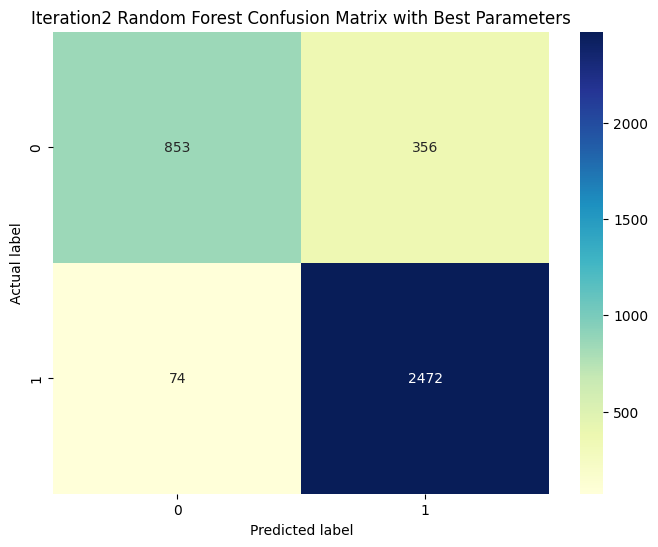

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm_rf = confusion_matrix(y_test, y_pred_rf_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu")  
plt.title("Iteration2 Random Forest Confusion Matrix with Best Parameters")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Iteration2_Confusion_Matrix_Best_RF.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()

In [266]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')
df_two_features_train = data_train['lemmatizedText'] + ' ' + data_train['username']
df_two_features_test = data_test['lemmatizedText'] + ' ' + data_test['username']

pipeline_svm_3 = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer(
            max_features=4500,  # Update from best parameters
            max_df=0.75,        # Update from best parameters
            stop_words=nltk_stopwords
        ))
    ])),
    ('classifier', SVC(
        C=1,                 # Update from best parameters
        kernel='rbf'         # Update from best parameters
    ))
])

pipeline_svm_3.fit(df_two_features_train, y_train)
svm_predictions = pipeline_svm_3.predict(df_two_features_test)

print("SVM Performance with Best Parameters and Addtional Feature username:")
print(classification_report(y_test, svm_predictions))

SVM Performance with Best Parameters and Addtional Feature username:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1209
           1       0.87      0.92      0.89      2546

    accuracy                           0.85      3755
   macro avg       0.84      0.81      0.82      3755
weighted avg       0.85      0.85      0.85      3755



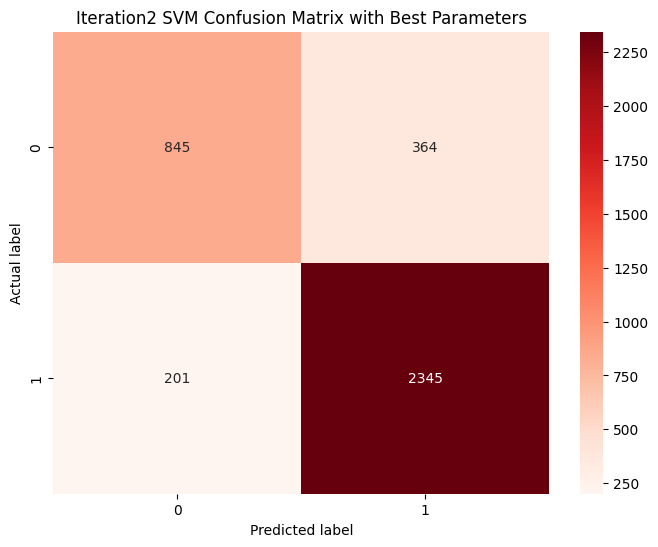

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm_rf = confusion_matrix(y_test, svm_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Reds")  
plt.title("Iteration2 SVM Confusion Matrix with Best Parameters")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

output_file_path = 'C:/Users/charl/Desktop/大三/COMP3222 MLT/CW/Image/Iteration2_Confusion_Matrix_Best_SVM.png'  
plt.savefig(output_file_path, bbox_inches='tight')

plt.show()